In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from ipywidgets import interact, widgets

In [1]:
import numpy as np

In [19]:
df = pd.read_csv("/data/pgcasado/datasets/acute/acute_dataset_example.csv")
df = df.sort_values(by="timestamp").dropna(axis = 1).dropna(axis = 0)
df.drop(columns="source", inplace=True)

df1 = df[df["station_name"] == "0QRDE8F0010496"]
df2 = df[df["station_name"] == "0QRDJCAR037P0N"]

df.head()

,journey,ident,model,location,timestamp,latitude,longitude,altitude,elevation,home_lat,home_lon,home_height,speed,heading,station_name,station_latitude,station_longitude
1,28115,F67PB22AU00300QE,Mavic 3C,1524689,2023-05-26 12:37:45,54.604872,-5.925845,96,6,54.602849,-5.924177,91,7,111,0QRDE8F0010496,54.613395,-5.873575
6,28116,F67PB22AU00300QE,Mavic 3C,1524690,2023-05-26 12:44:29,54.599486,-5.929552,104,9,54.602849,-5.924177,99,31,273,0QRDE8F0010496,54.613421,-5.873636
3,28116,F67PB22AU00300QE,Mavic 3C,1524691,2023-05-26 12:44:33,54.599440,-5.930044,104,8,54.602849,-5.924177,99,33,171,0QRDE8F0010496,54.613427,-5.873640
9,28117,37Q3K9N00BW2FP,FPV,1524692,2023-05-26 12:58:30,54.556451,-5.926859,87,38,54.552630,-5.924934,42,1,247,0QRDE8F0010496,54.613408,-5.873568
11,28117,37Q3K9N00BW2FP,FPV,1524693,2023-05-26 12:58:34,54.556451,-5.926853,89,38,54.552630,-5.924934,44,0,233,0QRDE8F0010496,54.613408,-5.873575


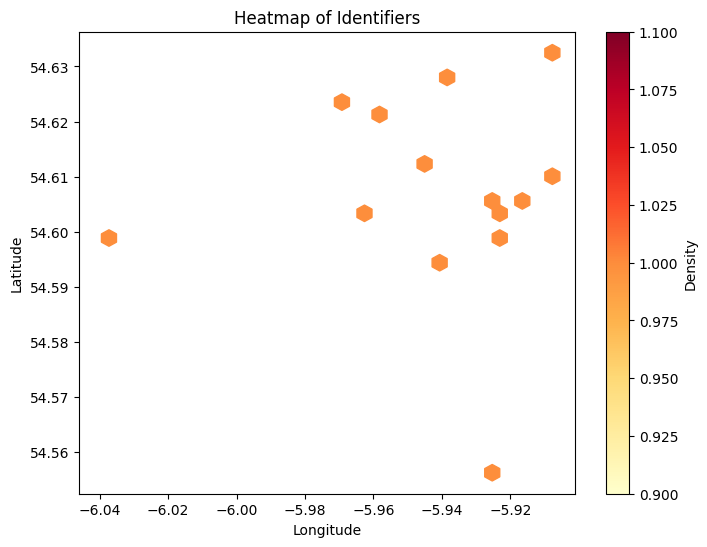

In [20]:
def plot_heatmap(df):
    # Assuming your DataFrame has columns 'ident', 'latitude', and 'longitude'
    # Grouping by 'ident' and aggregating mean values of latitude and longitude
    grouped = df.groupby('ident').agg({'latitude': 'mean', 'longitude': 'mean'})

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    plt.hexbin(grouped['longitude'], grouped['latitude'], gridsize=30, cmap='YlOrRd', mincnt=1)
    plt.colorbar(label='Density')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Heatmap of Identifiers')
    plt.show()
    
plot_heatmap(df1)

<AxesSubplot: xlabel='timestamp', ylabel='altitude'>

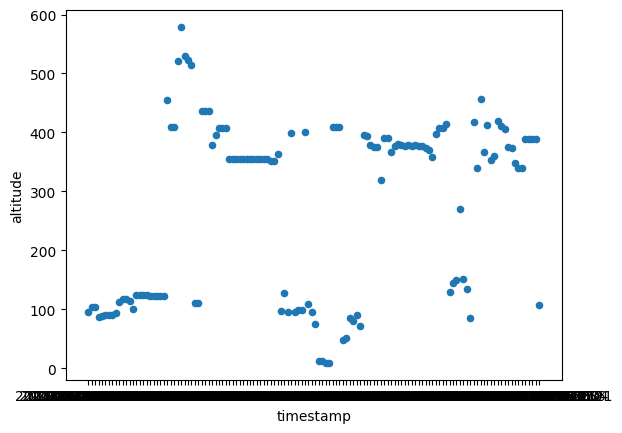

In [21]:
df.plot(x="timestamp", y="altitude", kind="scatter")

In [22]:
# plot the home_lat home_lon and the station location
# check if they are near an airport

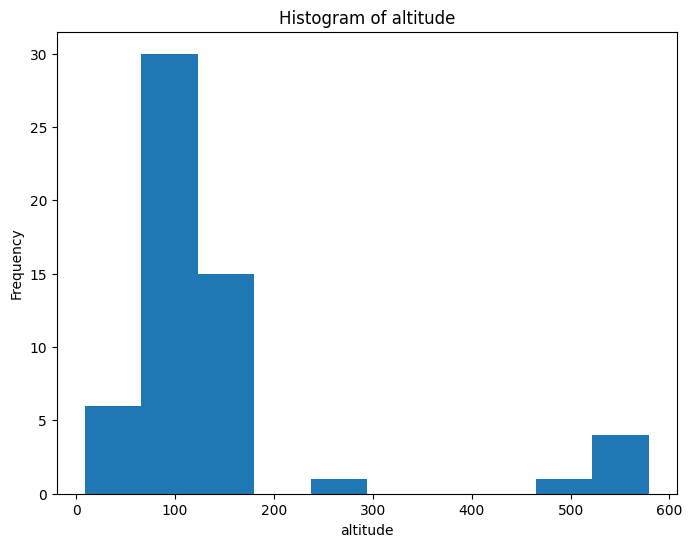

In [23]:
def plot_daily_frequency(df, column_name, num_bins=None):
    # Create a copy of the dataframe to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Ensure the timestamp column is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
    
    # Extract the date removing hours, minutes, and seconds
    df['date'] = df['timestamp'].dt.date
    
    if num_bins is None:
        # Group by date and the specified column, then count distinct dates
        daily_frequency = df.groupby(column_name)['date'].nunique().reset_index(name='Frequency')
        
        # Plot the frequency for categorical columns
        plt.figure(figsize=(12,6))
        plt.bar(daily_frequency[column_name], daily_frequency['Frequency'])
        plt.title('Daily Frequency of ' + column_name)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)  # Rotate x-axis labels for readability
        plt.show()
        
    else:
        # Plot histogram for numerical columns
        plt.figure(figsize=(8, 6))
        plt.hist(df[column_name], bins=num_bins)
        plt.title('Histogram of ' + column_name)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()
        
plot_daily_frequency(df1, "altitude", 10)

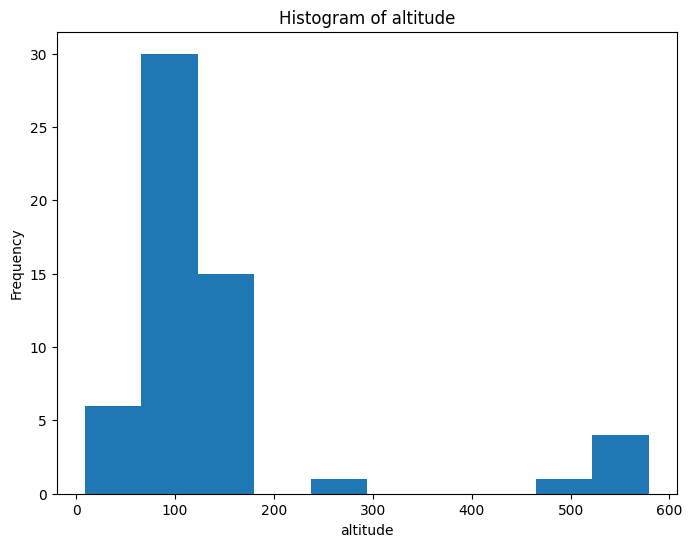

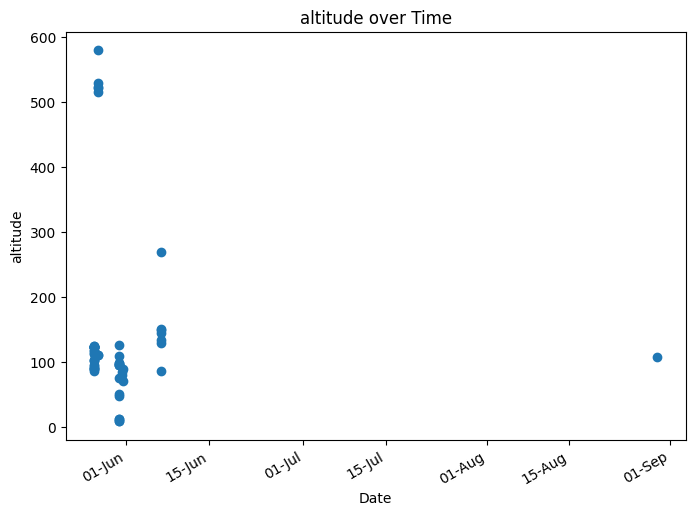

In [24]:
from matplotlib.dates import DateFormatter
def plot_daily_frequency(df, column_name, num_bins=None):
    # Create a copy of the dataframe to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Ensure the timestamp column is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
    
    # Extract the date removing hours, minutes, and seconds
    df['date'] = df['timestamp'].dt.date
    
    if df[column_name].dtype == 'object':
        # Group by date and the specified column, then count distinct dates
        daily_frequency = df.groupby(column_name)['date'].nunique().reset_index(name='Frequency')
        
        # Plot the frequency for categorical columns
        plt.figure(figsize=(12,6))
        plt.bar(daily_frequency[column_name], daily_frequency['Frequency'])
        plt.title('Daily Frequency of ' + column_name)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)  # Rotate x-axis labels for readability
        plt.show()
        
    elif pd.api.types.is_numeric_dtype(df[column_name]):
        # Plot histogram for numerical columns
        plt.figure(figsize=(8, 6))
        plt.hist(df[column_name], bins=num_bins)
        plt.title('Histogram of ' + column_name)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        
        # Formatting x-axis labels for scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df['timestamp'], df[column_name])
        plt.title(column_name + ' over Time')
        plt.xlabel('Date')
        plt.ylabel(column_name)
        
        # Use DateFormatter for better date formatting
        date_format = DateFormatter('%d-%b')
        plt.gca().xaxis.set_major_formatter(date_format)
        
        # Autoformatting the x-axis to ensure readability
        plt.gcf().autofmt_xdate()
        
        plt.show()
    else:
        print("Column type not supported for plotting.")
        
plot_daily_frequency(df1, "altitude")

In [25]:
unique_values_sorted = pd.Series({col: sorted(df[col].dropna().unique()) for col in df}, name = "uniques values")
num_unique_values = df.nunique()
num_unique_values.name = "num of unique"
pd.concat([unique_values_sorted, num_unique_values], axis=1)

,uniques values,num of unique
journey,"[2, 28115, 28116, 28117, 28118, 28119, 28120, ...",36
ident,"[041DD11194, 08RDEB800100KQ, 0UYSH9E0020010, 1...",32
model,"[FPV, In1, M2EA, Mavic 2, Mavic 3, Mavic 3C, M...",14
location,"[2, 1524689, 1524690, 1524691, 1524692, 152469...",132
timestamp,"[2023-05-26 12:37:45, 2023-05-26 12:44:29, 202...",132
latitude,"[49.553458, 49.553493, 49.559904, 49.577534, 4...",101
longitude,"[-6.039737, -6.039015, -6.03901, -5.969945, -5...",106
altitude,"[9, 13, 48, 51, 71, 75, 80, 85, 86, 87, 89, 90...",83
elevation,"[2, 4, 5, 6, 7, 8, 9, 11, 29, 30, 36, 37, 38, ...",57
home_lat,"[49.545826, 49.553407, 49.578995, 49.584856, 4...",35


In [26]:
df.describe()

,journey,location,latitude,longitude,altitude,elevation,home_lat,home_lon,home_height,speed,heading,station_latitude,station_longitude
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,28111.386364,1.517996e+06,51.770228,0.926570,277.757576,212.401515,51.770154,0.926362,64.825758,7.371212,199.227273,51.779024,0.958306
std,2474.597904,1.332292e+05,2.480977,6.018401,149.293712,143.944161,2.480921,6.017607,51.559570,12.082038,97.141087,2.480357,5.978600
min,2.000000,2.000000e+00,49.553458,-6.039737,9.000000,2.000000,49.545826,-6.042533,0.000000,0.000000,27.000000,49.624870,-5.873781
25%,28136.000000,1.524966e+06,49.612628,-5.938495,113.500000,44.000000,49.613001,-5.938920,30.000000,0.000000,106.000000,49.624912,-5.873574
50%,28286.000000,1.528712e+06,49.631467,6.115308,355.000000,298.500000,49.631770,6.114425,55.000000,1.000000,196.500000,49.624918,6.150536
75%,28378.000000,1.530555e+06,54.602736,6.154045,390.250000,337.000000,54.602746,6.152862,98.250000,9.250000,285.750000,54.613373,6.150552
max,28865.000000,1.544172e+06,54.632735,6.260756,579.000000,367.000000,54.632202,6.261094,282.000000,54.000000,359.000000,54.613536,6.150568


/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/d

/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/data/pgcasado/envs/acute/lib/python3.11/site-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/d

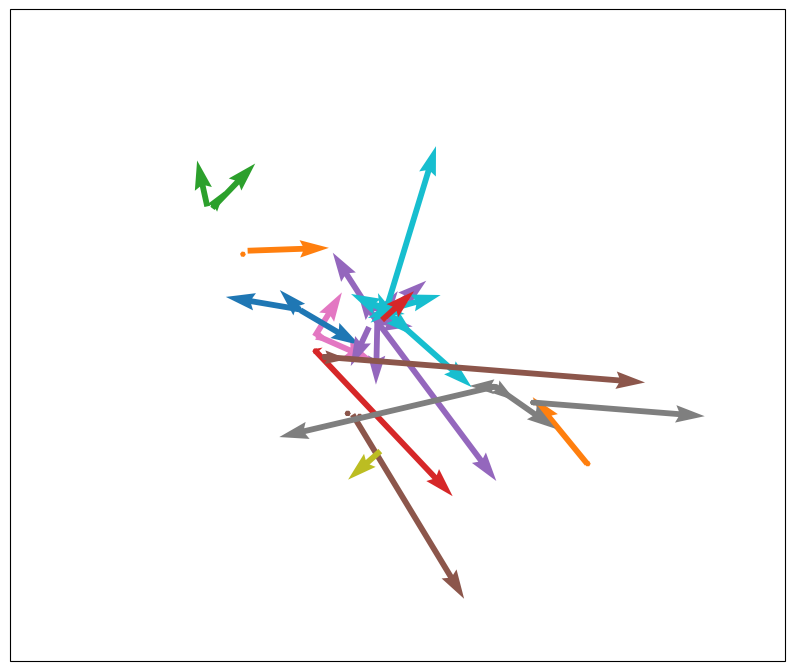

In [27]:
def plot_vectors(df):
    # Create a unique list of identities
    idents = df['ident'].unique()

    # Create a color dictionary for each unique identity
    colors = {ident: plt.cm.tab10(i % 10) for i, ident in enumerate(idents)}

    # Create a map using cartopy
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Set the limits of the plot
    ax.set_xlim([df['longitude'].min() - 0.1, df['longitude'].max() + 0.1])
    ax.set_ylim([df['latitude'].min() - 0.1, df['latitude'].max() + 0.1])

    # Plot each vector
    for ident in idents:
        ident_df = df[df['ident'] == ident]
        ax.quiver(ident_df['longitude'], ident_df['latitude'], ident_df['speed']*np.cos(ident_df['heading']), ident_df['speed']*np.sin(ident_df['heading']), color=colors[ident])

    plt.show()
    
plot_vectors(df2)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you have the required imports and DataFrame 'df'

idents = df['ident'].unique()
stations = df['station_name'].unique()
colors = {ident: plt.cm.tab10(i % 10) for i, ident in enumerate(idents)}

timestamp_label = widgets.Label()
station_dropdown = widgets.Dropdown(options=stations)
th_slider = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=0.5)

def update_plot(time, station_name, th):
    plt.clf()
    timestamp_label.value = f'Timestamp: {time}'
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    #ax.add_feature(cfeature.BORDERS)

    station_df = df[df['station_name'] == station_name]
    time_df = station_df[station_df['timestamp'] == time]

    ax.set_xlim([station_df['longitude'].min() - th, station_df['longitude'].max() + th])
    ax.set_ylim([station_df['latitude'].min() - th, station_df['latitude'].max() + th])

    for ident in idents:
        ident_df = time_df[time_df['ident'] == ident]
        if ident_df.shape[0] == 0:
            continue
        else:
            if ident_df['speed'].iloc[0] == 0:  # If speed is 0
                ax.plot(ident_df['longitude'], ident_df['latitude'], 'o', color=colors[ident])  # Plot a point
            else:
                ax.quiver(ident_df['longitude'], ident_df['latitude'],
                        ident_df['speed']*np.cos(ident_df['heading']),
                        ident_df['speed']*np.sin(ident_df['heading']),
                        color=colors[ident])

    plt.show()

def update_timestamps(change):
    station_name = change.new
    station_df = df[df['station_name'] == station_name]
    timestamps = np.sort(station_df['timestamp'].unique())
    slider.options = timestamps

timestamps = np.sort(df['timestamp'].unique())
slider = widgets.SelectionSlider(options=timestamps)
interact(update_plot, time=slider, station_name=station_dropdown, th=th_slider)

station_dropdown.observe(update_timestamps, names='value')
display(timestamp_label)


interactive(children=(SelectionSlider(description='time', options=('2023-05-26 12:37:45', '2023-05-26 12:44:29…

Label(value='Timestamp: 2023-05-26 12:37:45')

In [29]:
# Assuming you have the required imports and DataFrame 'df'

idents = df['ident'].unique()
stations = df['station_name'].unique()
colors = {ident: plt.cm.tab10(i % 10) for i, ident in enumerate(idents)}

timestamp_label = widgets.Label()
station_dropdown = widgets.Dropdown(options=stations)
th_slider = widgets.FloatSlider(min=0.001, max=2, step=0.005, value=0.05)

def update_plot(time, station_name, th):
    plt.clf()
    timestamp_label.value = f'Timestamp: {time}'
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    station_df = df[df['station_name'] == station_name]
    time_df = station_df[station_df['timestamp'] == time]

    # Get home coordinates for the selected station and time
    home_data = df[(df['station_name'] == station_name) & (df['timestamp'] == time)]

    home_lat = home_data['home_lat'].iloc[0]
    home_lon = home_data['home_lon'].iloc[0]

    # Get station coordinates for the selected station and time
    station_latitude = home_data['station_latitude'].iloc[0]
    station_longitude = home_data['station_longitude'].iloc[0]
    
    min_lon = min([station_df['longitude'].min(), station_longitude, home_lon])
    max_lon = max([station_df['longitude'].max(), station_longitude, home_lon])
    min_lat = min([station_df['latitude'].min(), station_latitude, home_lat])
    max_lat = max([station_df['latitude'].max(), station_latitude, home_lat])
    ax.set_xlim(min_lon - th, max_lon + th)
    ax.set_ylim(min_lat - th, max_lat + th)

    # Plotting triangle for home coordinates
    ax.plot(home_lon, home_lat, marker='^', color='black', markersize=10, label='Home')
    
    # Plotting square for station coordinates
    ax.plot(station_longitude, station_latitude, marker='s', color='black', markersize=10, label='Station')
    
    for ident in idents:
        ident_df = time_df[time_df['ident'] == ident]
        if ident_df.shape[0] == 0:
            continue
        else:
            if ident_df['speed'].iloc[0] == 0:
                ax.plot(ident_df['longitude'], ident_df['latitude'], 'o', color=colors[ident])
            else:
                ax.quiver(ident_df['longitude'], ident_df['latitude'],
                        ident_df['speed']*np.cos(ident_df['heading']),
                        ident_df['speed']*np.sin(ident_df['heading']),
                        color=colors[ident])

        ax.legend()
        plt.show()
    
def update_timestamps(change):
    station_name = change.new
    station_df = df[df['station_name'] == station_name]
    timestamps = np.sort(station_df['timestamp'].unique())
    slider.options = timestamps

timestamps = np.sort(df[df['station_name'] == df['station_name'].loc[0]]["timestamp"].unique())
slider = widgets.SelectionSlider(options=timestamps)
interact(update_plot, time=slider, station_name=station_dropdown, th=th_slider)

station_dropdown.observe(update_timestamps, names='value')
display(timestamp_label)


interactive(children=(SelectionSlider(description='time', options=('2023-05-26 12:37:45', '2023-05-26 12:44:29…

Label(value='Timestamp: 2023-05-26 12:37:45')

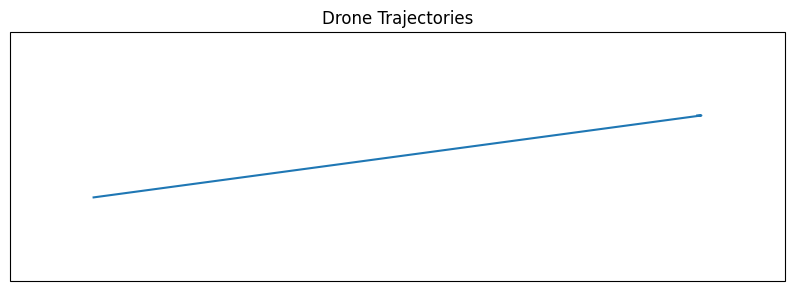

In [30]:


def plot_trajectory(df, th, id_drone):
    idents = df['ident'].unique()
    
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Create a map using cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add country borders
    ax.add_feature(cfeature.BORDERS)
    
    ax.set_xlim([df['longitude'].min() - th, df['longitude'].max() + th])
    ax.set_ylim([df['latitude'].min() - th, df['latitude'].max() + th])

    # Plot each drone's trajectory
    if id_drone is None:
        for ident in idents:
            drone_data = df[df['ident'] == ident]
            plt.plot(drone_data['longitude'], drone_data['latitude'], color=colors[ident], label=ident, transform=ccrs.PlateCarree())
    else:
        drone_data = df[df['ident'] == idents[id_drone]]
        ax.set_xlim([drone_data['longitude'].min() - th, drone_data['longitude'].max() + th])
        ax.set_ylim([drone_data['latitude'].min() - th, drone_data['latitude'].max() + th])
        plt.plot(drone_data['longitude'], drone_data['latitude'], label=idents[id_drone], transform=ccrs.PlateCarree())

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Drone Trajectories')
    plt.show()

plot_trajectory(df=df1, th=0.0001, id_drone=3)